# 监督学习

X->y Learn from being given the "right answers"

## 回归Regression

从无数可能的数字预测出一个数字
predict numbers & large number possible outputs
房价预测
判断垃圾邮件
预测用户是否点击广告

### 线性回归模型

![img.png](img.png)
$\hat{y}$:预测值 $y$:实际值
$$f_{W,b}(x) = Wx+b$$
单个变量(feature)的线性回归，需要找到对应的W和b能很好的拟合数据

#### 重点：构建cost function(代价函数)

##### 定义

$$J{(w,b)} = \frac{1}{2m} \sum_{i=1}^{m} (y^{(i)} - f_{W,b}(x))^2 $$
or
$$J{(w,b)} = \frac{1}{2m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 $$
m:训练集数据量
损失函数用来衡量模型预测结果与实际结果之间差异的函数。其值越小，代表模型预测结果越接近实际结果。在训练模型时，需要通过不断调整模型参数来最小化损失函数的值。

##### 直觉

$$minimizeJ(w,b) \atop{w,b}$$
Your goal is to find a model $$f_{w,b}(x) = wx + b$$, with parameters  $w,b$,
which will accurately predict house values given an input $x$.
The cost is a measure of how accurate the model is on the training data.

```python 
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0]
    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost
    total_cost = (1 / (2 * m)) * cost_sum

    return total_cost

``` 

![img_1.png](img_1.png)

```python

x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480, 430, 630, 730, ])

plt.close('all')
fig, ax, dyn_items = plt_stationary(x_train, y_train)
updater = plt_update_onclick(fig, ax, x_train, y_train, dyn_items)
```

$$f_{w}(x) = wx$$

$$f_{w,b}(x) = wx + b$$
w,b自变量。所以是三维图形，可以取切面最密集的点就是拟合最好的w和b
![img_2.png](img_2.png)

### 梯度下降算法Gradient descent algorithm

本质上是通过对当前$w,b$所在的位置进行修正，找到(1)式最低点的算法。  
So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing
a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$.
The measure is called the $cost$, $J(w,b)$.
In training, you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$
重复直到收敛
$$\begin{align*} \lbrace \newline
\; w &= w - \alpha \frac{\partial J(w,b)}{\partial w} \tag{3} \; \newline
b &= b - \alpha \frac{\partial J(w,b)}{\partial b} \newline \rbrace
\end{align*}$$
$\alpha$：0,1之间。代表梯度下降的速率(learning rate)。越大越激进

1.重复更新w,b的值直到算法收敛，即w,b每次更新都不会发生太大变化了

2.$w,b$同时更新，异步更新可能会造成问题

Where parameters$w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$\begin{align}
\frac{\partial J(w,b)}{\partial w} &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
\frac{\partial J(w,b)}{\partial b} &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}$$
![img_3.png](img_3.png)
![img_4.png](img_4.png)
3.越接近local minimum
-  $$\frac{\partial J(w,b)}{\partial w}$$Derivative becomes smaller
- $\delta{w}$Update steps become smaller
$\alpha$过大或过小造成的影响
过大：达不到最低点，无法收敛(converge) 甚至发散(diverge)
过小：步骤多且耗时
![img_5.png](img_5.png)

### 多元线性回归Multiple Variable Linear Regression

#### 向量化Vectorization

向量化:np.dot(w,x) + b
No 向量化(循环计算):$$f = w[0] * x[0] + w[1] * x[1] + w[2] * x[2] + b$$


![img_6.png](img_6.png)
使用向量计算dot而非循环计算的好处：利用并行计算提升效率

![img_7.gif](img_7.gif)
<center>点乘过程</center>

![img_8.png](img_8.png)

#### 多类特征Multiple features
单个特征—>多个特征:$x->x_1,x_2,...$  
占地面积->占地面积，卧室数量...  
使用list存储  
![](img_9.png)

examples are stored in a NumPy matrix X_train. Each row of the matrix represents one example. When you have $m$
training examples ( $m$ is three in our example), and there are $n$ features (four in our example), $\mathbf{X}$
is a matrix with dimensions ($m$, $n$) (m rows, n columns).

$$
\mathbf{X} = 
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\ 
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1} 
\end{pmatrix}
$$
notation:
- $\mathbf{x}^{(i)}$ is vector containing example i. $\mathbf{x}^{(i)} = (x^{(i)}_0, x^{(i)}_1, \cdots,x^{(i)}_
{n-1})$
- $x^{(i)}_j$ is element j in example i. The superscript in parenthesis indicates the example number while the
subscript represents an element.

#### 学习率learning rate
![](img_10.png)
![](img_11.png)

$\alpha$控制了参数更新的速率

![](img_12.png)

![](img_13.png)

提高学习率$\alpha$和增加迭代次数，作用都不大，如何解决？

#### 特征缩放Feature Scaling
        重新缩放数据集，使特征具有相似的范围。标准化特征，让特征分布均匀。
![](img_14.png)

##### 如何发现特征需要被缩放
![](img_15.png)

如上图，$w_0$只需要10次迭代就收敛了，而其他参数需要迭代非常多次  
造成这个现象的原因是$x_0$(平方英寸，千级别)非常的大，是别的feature的上千倍，所以乘以相同的倍数，该feature迭代梯度远大于其他，速度更快。  
上图展示了w更新不均匀的原因。   
  $\alpha$由所有参数更新（w和b）共享。  
  常见错误项乘以$w$的特征。  
  特征的大小差异很大，使得一些特征的更新速度比其他特征快得多。在这种情况下，$w_0$乘以“大小（平方英尺）”，通常>1000，而w_1乘以“卧室数量”，通常为2-4。  

##### 三种技巧

- 特征缩放, 让每个特征除以人为规定的值，结果落在-1和1之间。
- 均值归一化Mean normalization: $$x_i := \dfrac{x_i - \mu_i}{max - min} $$ 
- z-score归一化 Z-score normalization，所有特征的均值为0，标准差为1。
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag 4$$
where $j$ selects a feature or a column in the X matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{6}
\end{align}$$

#### 多元线性回归model
  $$f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
  or in vector notation:
  $$f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$
  where $$\cdot$$ is a vector dot product(向量乘)
  To demonstrate the dot product, we will implement prediction using (1) and (2).

#### 线性回归的评价指标

**均方误差（Mean Squared Error，MSE）**：

MSE 是模型预测值与真实值差的平方的平均值。它强调大的误差。

$$\begin{align}MSE = \frac{\Sigma (y_i - \hat{y}_i)^2}{n}\end{align}$$

适用场景：适用于回归任务中，尤其是对大的预测误差更加敏感的场景。
      

    
**均方根误差（Root Mean Squared Error，RMSE）**：

RMSE 是 MSE 的平方根，用于将误差带回与原始目标变量相同的量纲

$$\begin{align} RMSE = \sqrt{\frac{\Sigma (y_i - \hat{y}_i)^2}{n}} \end{align}$$

适用场景：与 MSE 类似，但 RMSE 更直观，误差与目标变量的尺度一致。

**平均绝对误差（Mean Absolute Error，MAE）**：

MAE 是预测值与真实值的绝对差的平均值，较少受大误差的影响。

$$\begin{align}MAE = \frac{\Sigma |y_i - \hat{y}_i|}{n}\end{align}$$  

**决定系数（Coefficient of Determination，R-squared，R²）**：
R²度量了线性回归模型对数据的拟合程度。它的取值范围在0到1之间，越接近1表示模型拟合得越好。
适用场景：用于评估回归模型的解释能力。

$$\begin{align}R² = 1 - \frac{\Sigma (yi - ŷi)²}{ \Sigma (yi - ȳ)²}\end{align}$$
其中 yi 表示实际观测值，ŷi 表示模型的预测值，ȳ 表示实际观测值的均值。
对于线性回归模型来说，除了SSE以外，我们还可使用决定系数（R-square，也被称为拟合优度检验）作为其模型评估指标。

决定系数的计算需要使用之前介绍的组间误差平方和和离差平方和的概念。在回归分析中，SSR表示聚类中类似的组间平方和概念，表意为Sum of squares of the regression，由预测数据与标签均值之间差值的平方和计算得出：

预测与均值的距离：
  $$SSR =\sum^{n}_{i=1}(\bar{y_i}-\hat{y_i})^2$$

实际与均值的距离(方差):
$$SST =\sum^{n}_{i=1}(\bar{y_i}-y_i)^2$$

并且，$SST$可由$$SSR+SSE$$计算得出。而决定系数，则由$SSR$和$SST$共同决定：
$$R-square=\frac{SSR}{SST}=\frac{SST-SSE}{SSE}=1-\frac{SSE}{SST}$$
很明显，决定系数是一个鉴于[0,1]之间的值，并且约趋近于1，模型拟合效果越好。

**调整R方值**

调整后的R方值（Adjusted R²）是在多个自变量的回归分析中更准确地评估模型的拟合优度。与普通R方值不同，调整后的R²会考虑自变量数量，不会因为增加不相关的自变量而人为提高模型的拟合度。
$$\begin{align} \text{Adjusted } R² = 1 - \left(\frac{(1 - R²)(n - 1)}{n - k - 1}\right) \end{align}$$其中： $R²$是普通的决定系数；$n$ 是样本数量； $k$ 是自变量的数量。
适用场景：在特征数较多时，调整 R² 比普通 R² 更合理。

## 分类Classification

predict categories & small number of out puts

Binary classification：$y$只能是0和1的其中一个

根据肿瘤大小判断是否癌症

### Sigmod or logistic函数

肿瘤大小(横轴)判定是否癌症(0,1纵轴)，数据分布如图。可以拟合成 曲线，即sigmod函数。
$$g(z) = \frac{1}{1+e^{-z}}\tag{1}$$

![](img_16.png)

在逻辑回归的情况下，z（sigmoid函数的输入）是线性回归模型的输出。 
- 在单个示例的情况下，z是标量。
- 在多个示例的情况下，z可以是由m个值组成的向量，每个示例一个。 
- sigmoid函数的实现应该涵盖这两种潜在的输入格式。

让我们在Python中实现这一点。
```python
def sigmoid(z):
    """6
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """

    g = 1/(1+np.exp(-z))
   
    return g
```

### 逻辑回归Logistic Regression

A logistic regression model applies the sigmoid to the familiar linear regression model as shown below:
$$f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) \tag{2} $$
  where$$g(z) = \frac{1}{1+e^{-z}}\tag{3}$$
Final formula
$$f_{w,b}(x^{(i)}) = \frac1{1 + e^{-wx+b}}\tag{4}$$
输出结果$$f_{w,b}(x^{(i)}) = 0.7$$,
代表患癌概率为70%


![](img_17.png)

#### 损失函数Loss Function

Loss：单个示例与目标值之间差异的指标

Cost：训练集损失的衡量标准

会导致结果出现多个局部最小值。算法确定全局最小值较为困难
      $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 $$的梯度cost曲线

![](img_18.png)
      
![](img_19.png)

方法：离散数据连续化
$$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$$ 单个示例的cost, 如下:
$$\begin{equation}
loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = \begin{cases}
- \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
\log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
\end{cases}
\end{equation}$$
      $$f_{\mathbf{w},b}(\mathbf{x}^{(i)})$$ 是预测值, while $y^{(i)}$ 是目标值.
      $$f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot\mathbf{x}^{(i)}+b)$$  $g$ 是 sigmoid function.

该损失函数由两条曲线构成，目标值为1和0时曲线的表现不同。越接近目标，曲线斜率越小，即损失函数对参数更不敏感。"速度放缓说明越接近真理",如图:

![](img_20.png)

#### 损失函数简化版
(1)式等价于
$$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$
该式中 $$y^{(i)} = 1 \space or \space0$$
$$\begin{align}
loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 0) &= (-(0) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 0\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \\
&= -\log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}$$
$$\begin{align}
loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 1) &=  (-(1) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 1\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\\
&=  -\log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}$$

下图成本与参数曲线:
```python
plt.close('all')
cst = plt_logistic_cost(x_train,y_train)
```
![](img_21.png)

这条曲线非常适合梯度下降。它没有停滞点(plateau)、局部极小值或不连续点。注意，它不像平方误差那样是碗状的。绘制成本和成本的对数是为了说明这样一个事实，即当成本较小时，曲线有一个斜率并继续下降。
假设使用线性回归损失函数模拟
单示例下成本函数为:
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$

#### 代价函数Cost Function

将所有的loss组合起来，成为成本函数
$$J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$
- $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$是单个数据点的cost
$$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
- m是数据集中训练的样本量:
$$\begin{align}
f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{3} \\
z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{4} \\
g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5} 
\end{align}$$

# Kaggle

## 偏度（skewness）
有偏度的数据不利于我们的建模预测。原因是很多模型都**假设数据误差项符合正态分布**  
数据集偏离平均值的概率。

是用来衡量概率分布或数据集中不对称程度的统计量。它描述了数据分布的尾部（tail）在平均值的哪一侧更重或更长。  
偏度可以帮助我们了解数据的**偏斜性质**，即**数据相对于平均值的分布情况**。

右偏:右偏分布在其峰值的右侧比其左侧更长。右偏也被称为正偏。它表明在分布的极端一端有观测值，但它们相对较少。右偏分布的右侧有一条长尾。

左偏:左偏分布的峰值左侧比右侧更长。左偏分布的左侧有一条长尾。左偏也被称为负偏。



### 现象

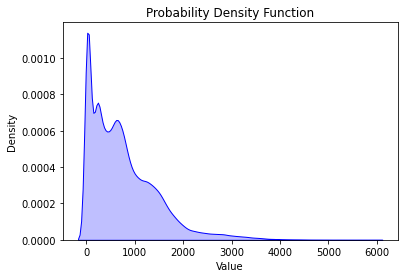

在预测sticker销量比赛中，遇到了右偏程度比较大的标签。大部分销量集中[0, 1000]。  
对标签标准化前后，同样的参数在lightgbm的表现相差了至少30%  
另外一个有趣的现象是，在使用xgboost的gamma回归器时能显著降低训练集的mape,这是因为这个数据符合gamama分布，但是并不能提高拟合效果
| Syntax      | 标准化后 | 标准化前 |
| ----------- | ----------- | ----------- |
| Overall Train MAPE      | 0.0457       |0.5495|
| Overall OOF MAPE   | 0.0859        |0.5801| 


In [7]:
%%time
params =  {'n_estimators': 2203, 'max_depth': 5, 'colsample_bytree': 0.5359752614980476,
            'subsample': 0.7271274739921461, 'learning_rate': 0.011247656752870117, 'min_child_weight': 74}

XGBresult = base.Train_ML(params,'XGB', y_log=True, g_col='year')

Training Folds: 100%|██████████| 5/5 [03:15<00:00, 39.11s/it]

Overall Train MAPE: 0.0457
Overall OOF MAPE: 0.0859 
CPU times: user 12min 37s, sys: 2.08 s, total: 12min 39s
Wall time: 3min 15s


In [8]:
%%time
params =  {'n_estimators': 2203, 'max_depth': 5, 'colsample_bytree': 0.5359752614980476,
            'subsample': 0.7271274739921461, 'learning_rate': 0.011247656752870117, 'min_child_weight': 74}

XGBresult = base.Train_ML(params,'XGB', y_log=False, g_col='year')

Training Folds: 100%|██████████| 5/5 [03:14<00:00, 38.94s/it]

Overall Train MAPE: 0.5495
Overall OOF MAPE: 0.5801 
CPU times: user 12min 28s, sys: 1.95 s, total: 12min 30s
Wall time: 3min 14s


### 处理方法

在上面的案例中，使用了log10(x+1)，来处理偏度较大的数据。

如何处理有偏度数据

如果你的统计过程需要正态分布并且你的数据是倾斜的，你通常有三个选择:

- 什么也不做：许多统计检验，包括t检验、方差分析和线性回归，对偏斜数据不太敏感。特别是如果偏斜是轻微或中度的，最好的办法就是忽略它。

- 数据转换：通过对数据应用某种变换，可以调整数据的分布形状，使其更接近**对称分布**。常见的数据转换方法包括取对数、开方、平方根等。这些转换可以减小或消除数据的偏度。

- 使用不同的模型：你可能想选择一个不假设正态分布的模型，非参数测试或广义线性模型可能更适合您的数据。比如说非参数方法：如果数据的偏度较大，而且无法通过简单的转换来纠正，可以考虑使用非参数统计方法。非参数方法不依赖于分布的假设，而是直接对数据进行分析，例如使用中位数作为代表性的位置测度，而不是平均值。

- 分组分析：如果数据集中存在明显的子群体，可以考虑对数据进行分组分析。通过将数据分成多个子群体，并对每个子群体进行单独的分析，可以更好地了解数据的特征和偏度情况。

- 针对特定问题采取相应的方法：根据具体的数据和分析目的，可以采用特定的方法来处理偏度数据。例如，在回归分析中，可以使用偏度稳定转换（skewness-stabilizing transformation）来调整数据的偏度，以满足回归模型的假设。

**根据偏态类型的变换**

| 偏态类型   | 偏态强度     | 变换方法            |
| ---------- | ------------ | ------------------- |
| **右偏**   | 轻微偏态     | 不变换              |
|            | 中度偏态     | 开方                |
|            | 强偏态       | 自然对数            |
|            | 非常强偏态   | 以10为底的对数      |
| **左偏**   | 轻微偏态     | 不变换              |
|            | 中度偏态     | 反转*然后开方       |
|            | 强偏态       | 反转*然后自然对数   |
|            | 非常强偏态   | 反转*然后以10为底的对数 |
